# Round 6. Degree correlations and assortativity

In this problem, we consider degree correlations and assortativity of two real-world networks: the Zachary karate club network `karate_club_network_edge_file.edg` (W. W. Zachary, 1977, “An information flow model for conflict and fission in small groups”) and a snowball-sampled subgraph of a Facebook friendships network `facebook-wosn-links_subgraph.edg` (http://konect.uni-koblenz.de/networks/facebook-wosn-links, B. Viswanath, A. Mislove, M. Cha, and K. P. Gummadi, 2009, “On the evolution of user interaction in facebook”).

To get started, you can use the provided Python template `degree_correlations_assortativity.py` OR this notebook for reference. The usage of the notebook or template is **optional**. Then you only need to fill in the required functions. Some of the functions do NOT need modifications. You may start your solution after the subtitle "**Begin of the Exercise**" down below. 

In addition to returning a report (including the visualizations, rquired results, and yor answers to questions), return also your commented Python code or notebook. Remember to label the axes in your figures!

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import binned_statistic_2d
import matplotlib as mpl

In [2]:
def create_scatter(x_degrees, y_degrees, network_title):
    """
    For x_degrees, y_degrees pair, creates and
    saves a scatter of the degrees.

    Parameters
    ----------
    x_degrees: np.array
    y_degrees: np.array
    network_title: str
        a network-referring title (string) for figures

    Returns
    -------
    fig: figure object
    """

    fig = plt.figure()
    ax = fig.add_subplot(111)

    alpha = 0.5
    ax.plot(x_degrees, y_degrees, 'r', ls='', marker='o', ms=5, alpha=alpha)
    ax.set_xlabel(r'Degree $k$')
    ax.set_ylabel(r'Degree $k$')

    ax.set_title(network_title)

    return fig

In [3]:
def create_heatmap(x_degrees, y_degrees, network_title):
    """
    For x_degrees, y_degrees pair, creates and
    saves a heatmap of the degrees.

    Parameters
    ----------
    x_degrees: np.array
    y_degrees: np.array
    network_title: str
        a network-referring title (string) for figures

    Returns
    -------
    
    fig: figure object
    """
    k_min = np.min((x_degrees, y_degrees))
    k_max = np.max((x_degrees, y_degrees))

    n_bins = k_max-k_min+1
    values = np.zeros(x_degrees.size)

    statistic = binned_statistic_2d(x_degrees,y_degrees, values,
                                    statistic='count', bins=n_bins)[0]

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.imshow(statistic, extent=(k_min-0.5, k_max+0.5, k_min-0.5, k_max+0.5),
              origin='lower', cmap='hot', interpolation='nearest')
    ax.set_title(network_title)
    ax.set_xlabel(r'Degree $k$')
    ax.set_ylabel(r'Degree $k$')
    cmap = plt.get_cmap('hot')
    norm = mpl.colors.Normalize(vmin=np.min(statistic), vmax=np.max(statistic))
    scm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    plt.colorbar(scm, ax=ax)
    return fig

## Begin of the Exercise
Beginning here you might need to edit the code.

## Datapaths
Let us load the data from the right folder and assign the names for all the plots we will save. If you run this notebook in your machine, please specify the right folder.

In [4]:
# Select data directory
import os
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    course_data_dir = 'some_path'
    # YOUR CODE HERE
    #raise NotImplementedError()

print('The data directory is %s' % course_data_dir)

The data directory is /coursedata


In [5]:
network_paths = ['karate_club_network_edge_file.edg', 'facebook-wosn-links_subgraph.edg']
network_names = ['karate', 'facebook-wosn']
network_titles = ['Karate club network', 'Facebook friendships network']
scatter_figure_base = './edge_degree_correlation_scatter_'
heatmap_figure_base = './edge_degree_correlation_'
nearest_neighbor_figure_base = './nearest_neighbor_degree_'

## a) Create Scatter Plots
Create scatter plots of the degrees of pairs of connected nodes. That is, take each connected pair of nodes $(i,j)$, take their degrees $k_i$ and $k_j$, plot the point $(k_i,k_j)$ on two axes with degrees as their units, and repeat for all pairs of connected nodes. Do this for both Karate club and Facebook network. Because the network are undirected, the plots should be symmetrical, containing points $(k_i,k_j)$ and $(k_j,k_i)$ for all connected pairs $(i,j)$. 


In [6]:
def get_x_and_y_degrees(network):
    """
    For the given network, creates two arrays (x_degrees
    and y_degrees) of the degrees of "start" and "end" nodes of each edge in
    the network. For undirected networks, each edge is considered twice.

    Parameters
    ----------
    network: a NetworkX graph object

    Returns
    -------
    x_degrees: np.array
    y_degrees: np.array
    """
    edges = network.edges()
    n_edges = len(edges)
    x_degrees = np.zeros(2 * n_edges).tolist()
    y_degrees = np.zeros(2 * n_edges).tolist()
    
    #TODO: write a correct definition for x_arrays and y_arrays
    # check the excercise sheet for more information
    last_index = len(x_degrees) - 1
    for i, edge in enumerate(edges):
        right_ptr =  last_index - i
        x_degrees[i] = network.degree[edge[0]]
        y_degrees[i] = network.degree[edge[1]]
        
        y_degrees[right_ptr] = network.degree[edge[0]]
        x_degrees[right_ptr] = network.degree[edge[1]]
    #raise NotImplementedError()
    return np.asarray(x_degrees), np.asarray(y_degrees)

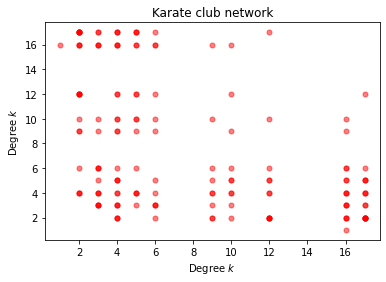

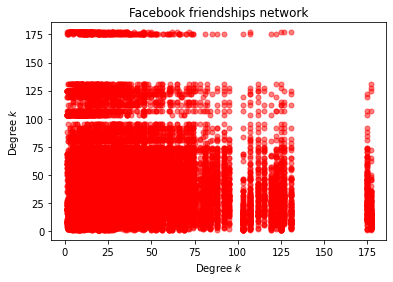

In [7]:
#loop through the networks, produce the scatterpolt for each network and save the plot in the corresponding path
for network_path, network_name, network_title in zip(network_paths, network_names, network_titles):
    network_pname = os.path.join(course_data_dir, network_path)
    network = nx.read_weighted_edgelist(network_pname)
    x_degrees, y_degrees = get_x_and_y_degrees(network)

    fig = create_scatter(x_degrees, y_degrees, network_title)
    fig.savefig(scatter_figure_base+network_name+'.pdf')

## b) Heatmap
For the Facebook friendship network, produce a heat map of the degrees of connected node pairs (\url{http://en.wikipedia.org/wiki/Heat_map). The heat map uses the same information as you used in part a), that is, the degrees of pairs of connected nodes. However, no points are plotted: rather, the two degree axes are **binned** and the number of degree pairs $(k_i,k_j)$ in each bin is computed. Then, the bin is colored according to this number (e.g., red = many connected pairs of nodes with degrees falling in the bin). Again, the heat map ought to be symmetrical. 
**What extra information do you gain by using a heatmap instead of just a scatter plot (if any)?**

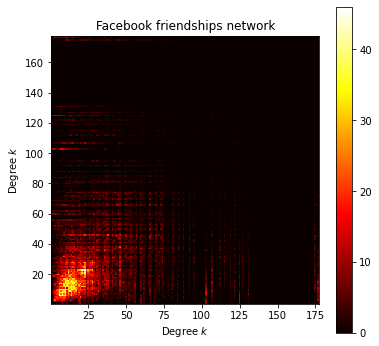

In [8]:
for network_path, network_name, network_title in zip(network_paths, network_names, network_titles):
    if network_name == 'facebook-wosn':
        network_pname = os.path.join(course_data_dir, network_path)
        network = nx.read_weighted_edgelist(network_pname)
        x_degrees, y_degrees = get_x_and_y_degrees(network)

        fig = create_heatmap(x_degrees, y_degrees, network_title)
        fig.savefig(heatmap_figure_base+network_name+'.pdf')

## c) Assortativity
The assortativity coefficient is defined as the Pearson correlation coefficient of the degrees of pairs of connected nodes.
**Calculate and report the assortativity coefficients for the two networks** both using `scipy.stats.pearsonr` and NetworkX function `degree_assortativity_coefficient`. Check that both methods return the same value.
As mentioned in the lecture, social networks are typically assortative. **Does this hold for the Zachary carate club network? Explain how does the specific structure of network impacts assortativity in this case?**

In [19]:
def assortativity(x_degrees, y_degrees):
    """
    Calculates assortativity for a network, i.e. Pearson correlation
    coefficient between x_degrees and y_degrees in the network.

    Parameters
    ----------
    x_degrees: np.array
    y_degrees: np.array

    Returns
    -------
    assortativity: float
        the assortativity value of the network as a number
    """
    assortativity = 0 # to be replaced
    #TODO: write code for calculating assortativity
    kikj=np.mean([x_degrees[i] * y_degrees[i] for i in range(len(x_degrees))])
    avg_kivg_kj=np.mean(x_degrees) * np.mean(y_degrees)
    denom_i=np.sqrt(np.mean([i**2 for i in x_degrees]) - np.mean(x_degrees)**2)
    denom_j=np.sqrt(np.mean([i**2 for i in y_degrees]) - np.mean(y_degrees)**2)
    # YOUR CODE HERE
    assortativity=(kikj-avg_kivg_kj) / (denom_i * denom_j)
    #raise NotImplementedError()
    return assortativity

In [20]:
for network_path, network_name, network_title in zip(network_paths, network_names, network_titles):
    network_pname = os.path.join(course_data_dir, network_path)
    network = nx.read_weighted_edgelist(network_pname)
    x_degrees, y_degrees = get_x_and_y_degrees(network)
    
    # assortativities
    assortativity_own = assortativity(x_degrees, y_degrees)
    assortativity_nx = nx.degree_assortativity_coefficient(network)
    print("Own assortativity for " + network_title + ": " +
            str(assortativity_own))
    print("NetworkX assortativity for " + network_title + ": " +
            str(assortativity_nx))

Own assortativity for Karate club network: -0.4756130976846143
NetworkX assortativity for Karate club network: -0.47561309768461457
Own assortativity for Facebook friendships network: 0.05598478476593016
NetworkX assortativity for Facebook friendships network: 0.05598478476593048


## d) Average Nearest Neighbor Degree
**For the Facebook network, draw the curve** of $<k_{nn}>$ as a function of $k$, *i.e.* the averaged $k_{nn}$ for each $k$. In a perfectly assortative network, $<k_{nn}>$ increases monotonicly as a function of $k$. **Is this the case here?** Looking at the curve, can you identify different regimes regarding to assortativity? **Describe them shortly**.


In [101]:
def get_nearest_neighbor_degree(network):
    """
    Calculates the average nearest neighbor degree for each node for the given
    list of networks.

    Parameters
    ----------
    network: a NetworkX graph objects

    Returns
    -------
    degrees: list-like
        an array of node degree
    nearest_neighbor_degrees: list-like
        an array of node average nearest neighbor degree in the same order
        as degrees
    """
    #degrees = sorted(network.degree, key=lambda x: x[0])
    degrees = np.array([i[1] for i in list(network.degree(network.nodes()))]) #to be replaced
    nn_dict = nx.average_neighbor_degree(network)
    nearest_neighbor_degrees = []
    for index, node in enumerate(list(network.nodes())):
        nearest_neighbor_degrees.append(nn_dict[node])
    nearest_neighbor_degrees = np.array(nearest_neighbor_degrees)
    
    
    #nearest_neighbor_degrees =sorted(nx.average_neighbor_degree(network), key=lambda x: x[0]) 
    
    #TODO: write code for calculating degrees and average nearest neighbor degrees of the networks.
    # Hint: if using nx.degree() and nx.average_neighbor_degree(), remember that 
    # key-value pairs of dictionaries are not automatically in a fixed order!
    # YOUR CODE HERE
    #raise NotImplementedError()
    return degrees, nearest_neighbor_degrees

In [105]:
def calculate_average_y_for_each_unique_x_value(x_values, y_values):
    """
    Calculates average of y values for each unique x-value.

    Parameters
    ----------
    x_values: an array of x values
    y_values: an array of corresponding y values

    Returns
    -------
    unique_x_values: an array of unique x values
    bin_average: an array of average y values per each unique x
    """
    #TODO: make an array of uniqe x-values. This array will be used to compute average of y-values corresponding to each unique x-value.
    unique_x_values = np.unique(x_values)
    #raise NotImplementedError()
    y_averages = np.array([np.mean(y_values[np.where(x_values == b)]) for b in unique_x_values])
    
    return unique_x_values, y_averages

In [106]:
#you do not need to change anything in this function
def visualize_nearest_neighbor_degree(degrees, nearest_neighbor_degrees, unique_x_value, y_averages,
                                      network_title):
    """
    Visualizes the nearest neighbor degree for each degree as a scatter and
    the mean nearest neighbor degree per degree as a line.

    Parameters
    ----------
    degrees: list-like
        an array of node degrees
    nearest_neighbor_degrees: list-like
        an array of node nearest neighbor degrees in the same order as degrees
    unique_x_value: list-like
        unique degree values
    y_averages: list-like
        the mean nearest neighbor degree per unique degree value
    network_title: str
        network-referring title (string) for figure

    Returns
    -------
    fig : figure object
    """

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.loglog(degrees, nearest_neighbor_degrees,
              ls='', marker='.', label=r'$k_{nn}$($k$)')
    ax.loglog(unique_x_value, y_averages,
              color='r', label=r'<$k_{nn}$>($k$)')
    ax.set_title(network_title)
    ax.set_xlabel(r'Degree $k$')
    ax.set_ylabel(r'Average nearest neighbor degree $k_{nn}$')
    ax.legend(loc=0)
    return fig

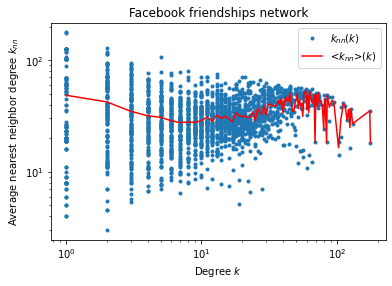

In [107]:
for network_path, network_name, network_title in zip(network_paths, network_names, network_titles):
    network_pname = os.path.join(course_data_dir, network_path)
    network = nx.read_weighted_edgelist(network_pname)

    # nearest neighbor degrees
    if network_name == 'facebook-wosn':
        degrees, nearest_neighbor_degrees = get_nearest_neighbor_degree(network)
        unique_degrees, mean_nearest_neighbor_degrees = calculate_average_y_for_each_unique_x_value(degrees,
                                                                               nearest_neighbor_degrees)
        fig = visualize_nearest_neighbor_degree(degrees,
                                                nearest_neighbor_degrees,
                                                unique_degrees,
                                                mean_nearest_neighbor_degrees,
                                                network_title)
        fig.savefig(nearest_neighbor_figure_base + network_name + '.pdf')